# Operational Chroma Scan

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

## Function declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [10]:
main_label = 'PS_Transfer_Operational'
sc = 'noSC'
legend_label = r'$\frac{\delta p}{p_0}$'
save_folder = 'Plots/Operational/Simple_500um/'

## Load bunch data

In [11]:
load_bunch_data = False

In [12]:
if load_bunch_data:
    # We have 7 simulations per scan 
    dd = dict()

    maxi = 30
    turns = range(0, maxi)
    print turns

    folders = []
    folders.append('01_01')
    folders.append('01_02')
    folders.append('01_03')
    folders.append('01_04')
    folders.append('01_05')
    folders.append('01_06')
    folders.append('01_07')

    for fol in folders:
        dd_temp = dict()
        for t in turns:
            if t <= 9:    inputs = str(fol + '/bunch_output/mainbunch_00000' + str(int(t)) + '.mat')
            else:    inputs = str(fol + '/bunch_output/mainbunch_0000' + str(int(t)) + '.mat')
            #print inputs
            dd_temp = add_input_file(dd_temp, inputs, t+1)
        dd_temp = add_input_file(dd_temp, str(fol + '/bunch_output/mainbunch_-000001.mat'), 0)
        dd[int(fol[3:5])] = dd_temp

    print sorted(dd.keys())
    
    # access all particle x co-ordinates like this
    print dd[1][0]['particles']['dE'][0][0][0]

# Load output data

In [13]:
ddo = dict()
ddo = add_input_file(ddo, '01_01/output/output.mat', -3E-3)
ddo = add_input_file(ddo, '01_02/output/output.mat', -2E-3)
ddo = add_input_file(ddo, '01_03/output/output.mat', -1E-3)
ddo = add_input_file(ddo, '01_04/output/output.mat', 0)
ddo = add_input_file(ddo, '01_05/output/output.mat', 1E-3)
ddo = add_input_file(ddo, '01_06/output/output.mat', 2E-3)
ddo = add_input_file(ddo, '01_07/output/output.mat', 3E-3)

	Added output data from  01_01/output/output.mat 	 dictionary key:  -0.003
	Added output data from  01_02/output/output.mat 	 dictionary key:  -0.002
	Added output data from  01_03/output/output.mat 	 dictionary key:  -0.001
	Added output data from  01_04/output/output.mat 	 dictionary key:  0
	Added output data from  01_05/output/output.mat 	 dictionary key:  0.001
	Added output data from  01_06/output/output.mat 	 dictionary key:  0.002
	Added output data from  01_07/output/output.mat 	 dictionary key:  0.003


In [14]:
main_label = 'Operational_Chroma'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [15]:
ddo[0].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

(-1, 30)

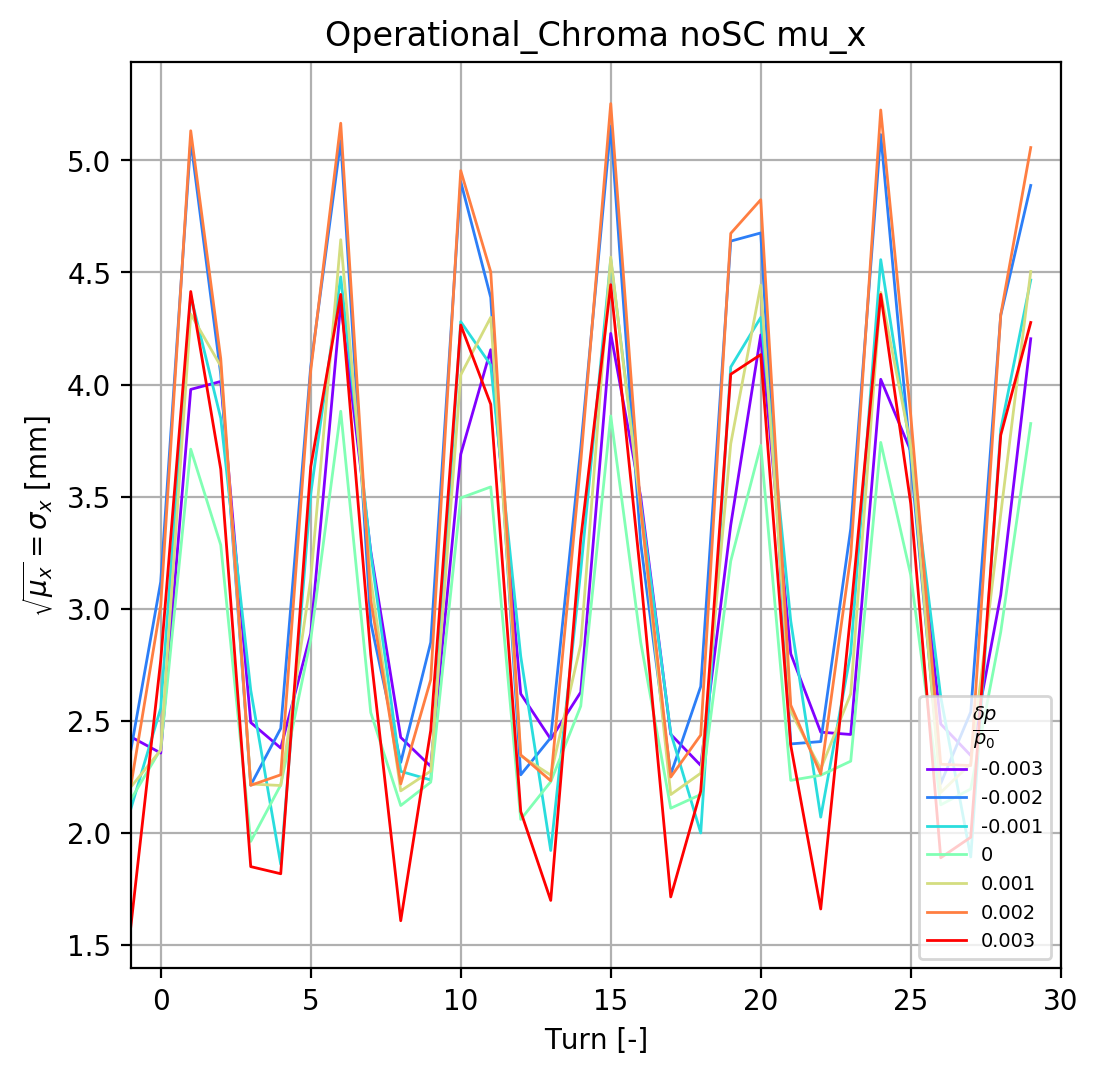

In [16]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], np.sqrt(ddo[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

#savename = 'Plots/Param_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

# Save frequencies using different methods

In [17]:
qx_harmonic = []
qy_harmonic = []

qx_fft = []
qy_fft = []

qx_naff = []
qy_naff = []


 Momentum Offset =  -0.003
 Offset =  -0.32239532656272774  mm
 Amplitude =  0.6219405453417649  mm
 Frequency =  0.2201
 Phase offset =  0.4724727765202316

 Momentum Offset =  -0.002
 Offset =  -0.41864916587942697  mm
 Amplitude =  0.8271126721724958  mm
 Frequency =  0.2178
 Phase offset =  -0.13741020722632538

 Momentum Offset =  -0.001
 Offset =  -1.0532905430428896  mm
 Amplitude =  0.8293882531859333  mm
 Frequency =  0.2174
 Phase offset =  0.14651400914886228

 Momentum Offset =  0
 Offset =  -0.9732912738330787  mm
 Amplitude =  0.9705089011473648  mm
 Frequency =  0.2176
 Phase offset =  0.013970512963211515

 Momentum Offset =  0.001
 Offset =  -0.9984962761962616  mm
 Amplitude =  0.8521901884102401  mm
 Frequency =  0.2644
 Phase offset =  -0.3713868378438171

 Momentum Offset =  0.002
 Offset =  -0.7735593748906084  mm
 Amplitude =  0.9274033713003192  mm
 Frequency =  0.2164
 Phase offset =  0.06375706564255874

 Momentum Offset =  0.003
 Offset =  -0.607299633791646

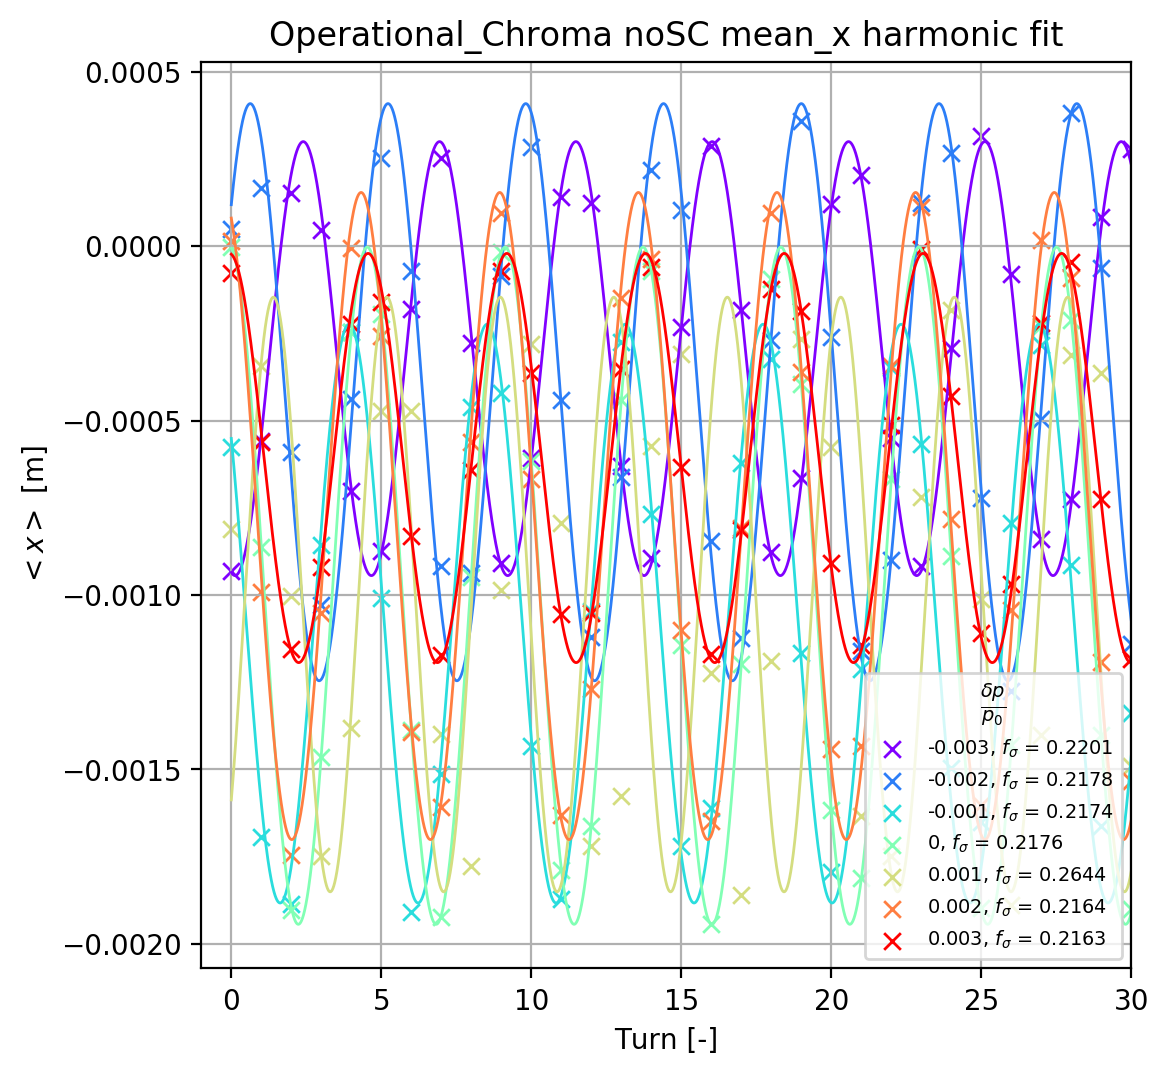

In [18]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit'
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))

    mean_y = np.mean(ddo[key][parameter][0])
    if mean_y < 0.0 :
        offset_min = 1.1 * np.mean(ddo[key][parameter][0])
        offset_max = 0.9 * np.mean(ddo[key][parameter][0])
    else:
        offset_min = 0.9 * np.mean(ddo[key][parameter][0])
        offset_max = 1.1 * np.mean(ddo[key][parameter][0])    

    amp_min = 0.5 * 0.999 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))
    amp_max = 0.5 * 1.001 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))

    freq_min = 0.15
    freq_max = 0.3

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, ddo[key][parameter][0], method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0] * 1E3, ' mm'
    print ' Amplitude = ', popt[1] * 1E3, ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, ddo[key][parameter][0], label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qx_harmonic.append(popt[3])
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_harmonic.png'
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.003
 Offset =  0.029572839524905033  mm
 Amplitude =  1.2109420335023062  mm
 Frequency =  0.2432
 Phase offset =  -0.29222734619810253

 Momentum Offset =  -0.002
 Offset =  0.0009325700505128996  mm
 Amplitude =  0.5061426414333452  mm
 Frequency =  0.2428
 Phase offset =  -0.3827714702218159

 Momentum Offset =  -0.001
 Offset =  0.018440582864912052  mm
 Amplitude =  0.8304457703851024  mm
 Frequency =  0.2406
 Phase offset =  0.04974094353758807

 Momentum Offset =  0
 Offset =  0.0387375459344583  mm
 Amplitude =  0.9970925961673106  mm
 Frequency =  0.2434
 Phase offset =  -0.10064165496592527

 Momentum Offset =  0.001
 Offset =  -0.005485615230444169  mm
 Amplitude =  0.22204632468219138  mm
 Frequency =  0.204
 Phase offset =  0.6181384055878935

 Momentum Offset =  0.002
 Offset =  0.015425422010916276  mm
 Amplitude =  0.4348877143183691  mm
 Frequency =  0.2401
 Phase offset =  -0.18828645074053132

 Momentum Offset =  0.003
 Offset =  -0.0326084365

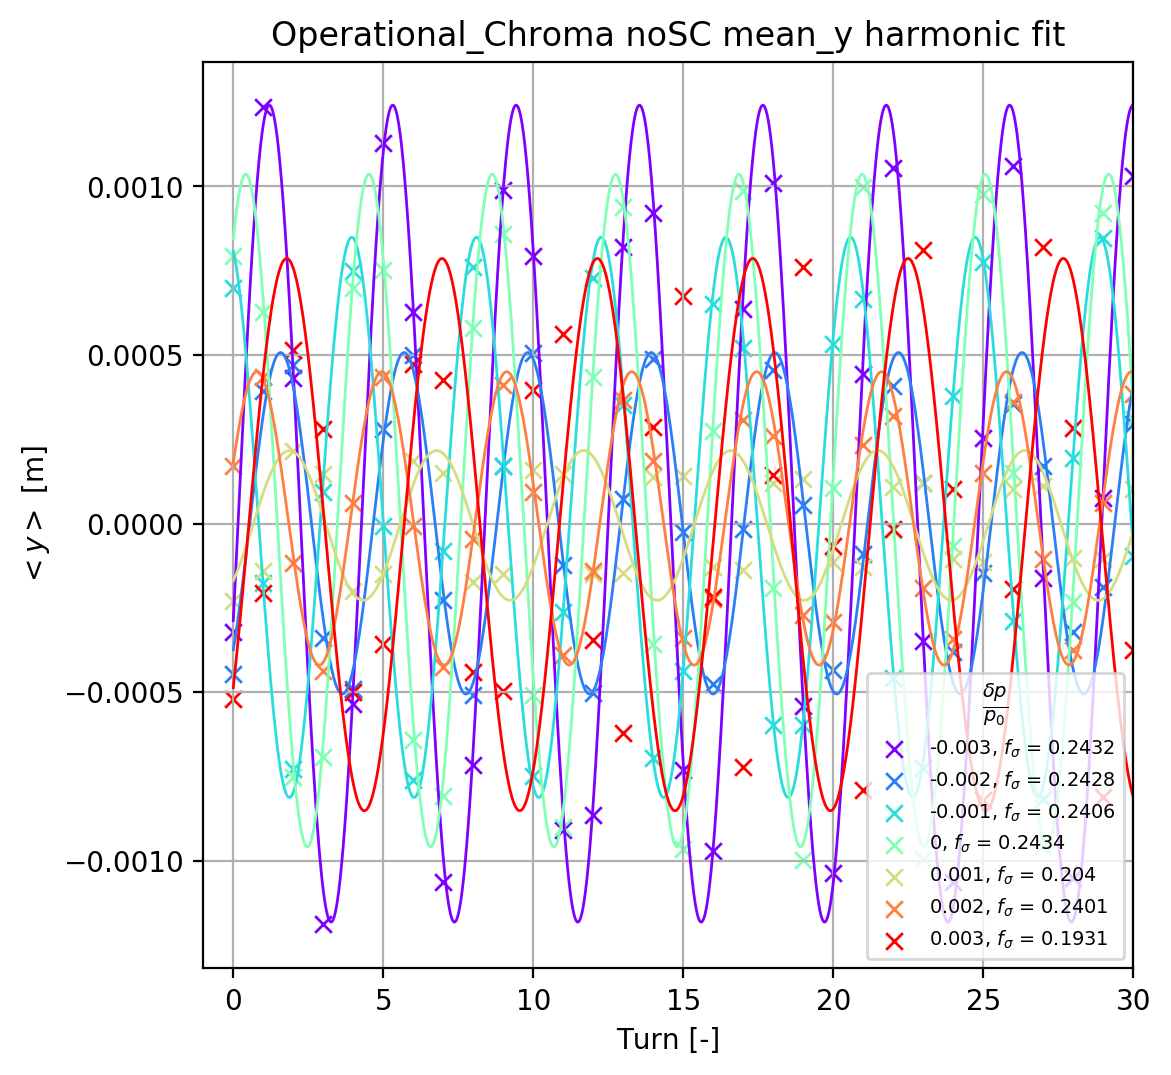

In [19]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit'
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))

    mean_y = np.mean(ddo[key][parameter][0])
    if mean_y < 0.0 :
        offset_min = 1.1 * np.mean(ddo[key][parameter][0])
        offset_max = 0.9 * np.mean(ddo[key][parameter][0])
    else:
        offset_min = 0.9 * np.mean(ddo[key][parameter][0])
        offset_max = 1.1 * np.mean(ddo[key][parameter][0])    

    amp_min = 0.5 * 0.999 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))
    amp_max = 0.5 * 1.001 * (np.max(ddo[key][parameter][0]) - np.min(ddo[key][parameter][0]))

    freq_min = 0.15
    freq_max = 0.3

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, ddo[key][parameter][0], method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0] * 1E3, ' mm'
    print ' Amplitude = ', popt[1] * 1E3, ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, ddo[key][parameter][0], label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_harmonic.png'
plt.savefig(savename, dpi = 800);

/usr/lib64/python2.7/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


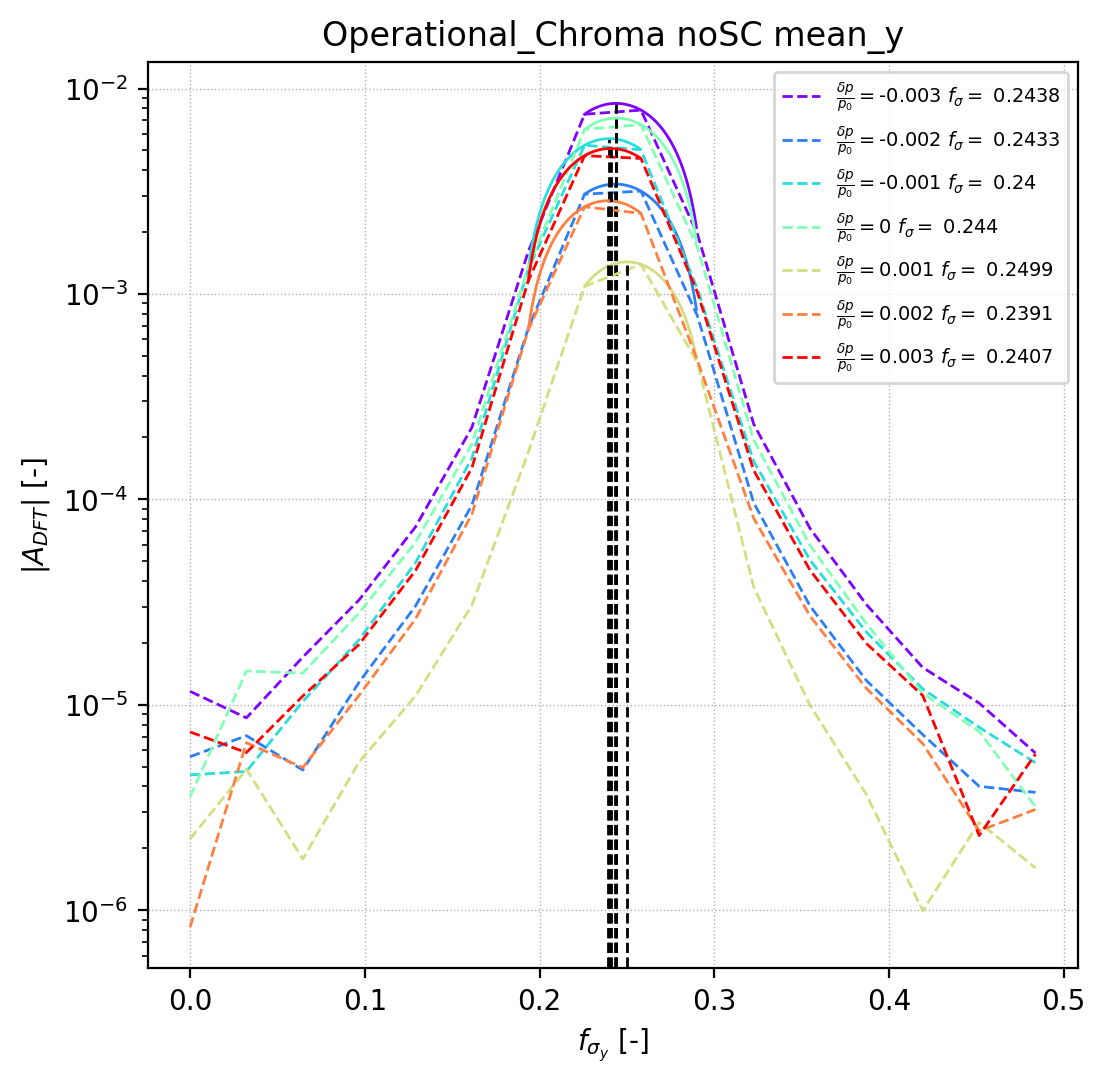

In [20]:
# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' mean_y'
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{y}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_y'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_y.append(f_max)
    qy_fft.append(f_max)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'y_fft.png'
plt.savefig(savename, dpi = 800);

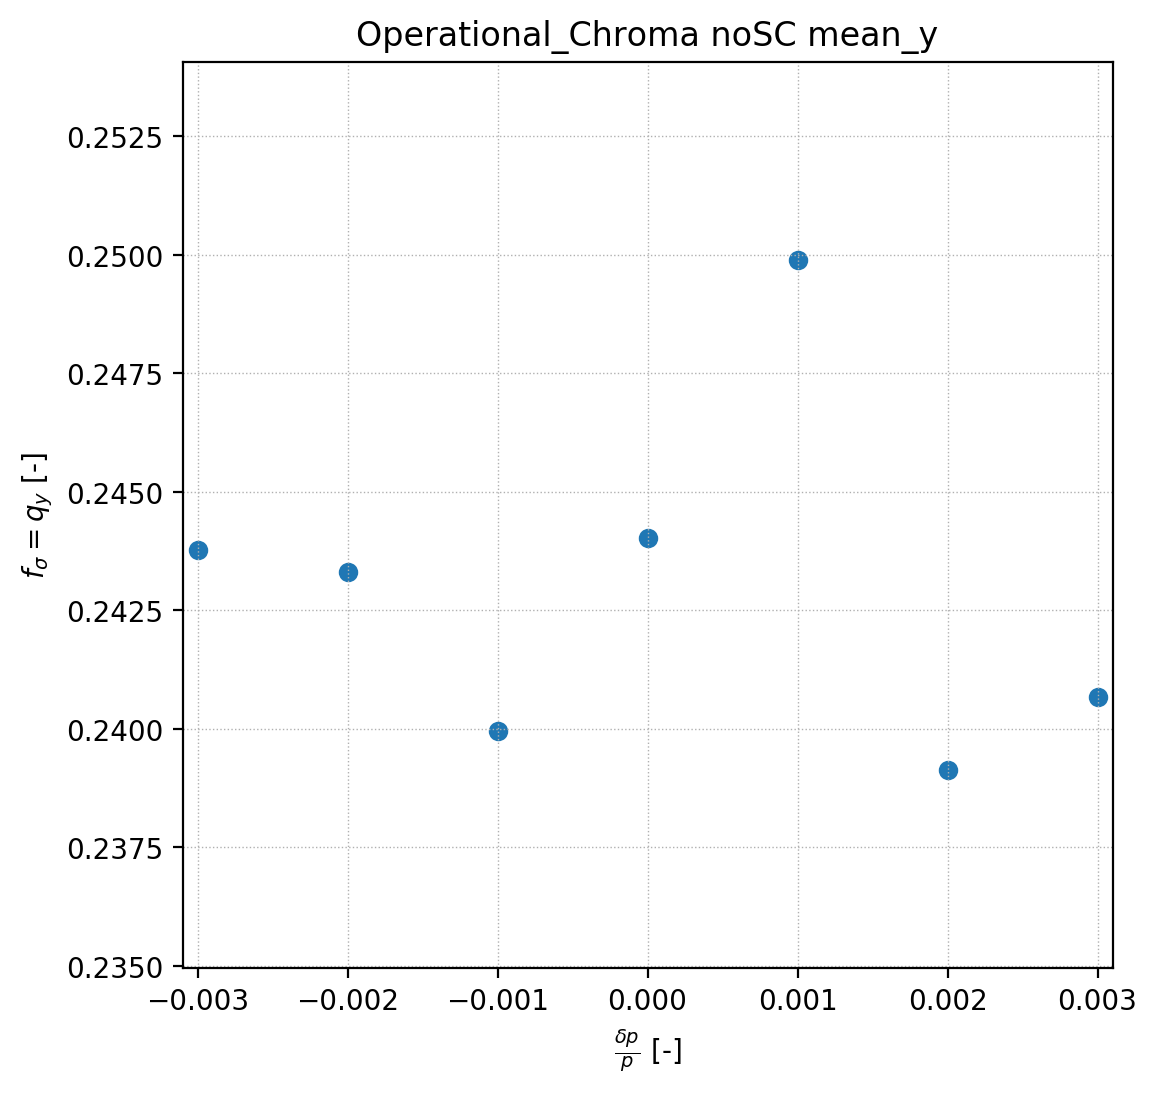

In [21]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' mean_y'
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, f_sig_y);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

savename = save_folder + 'qy.png'
plt.savefig(savename, dpi = 800);

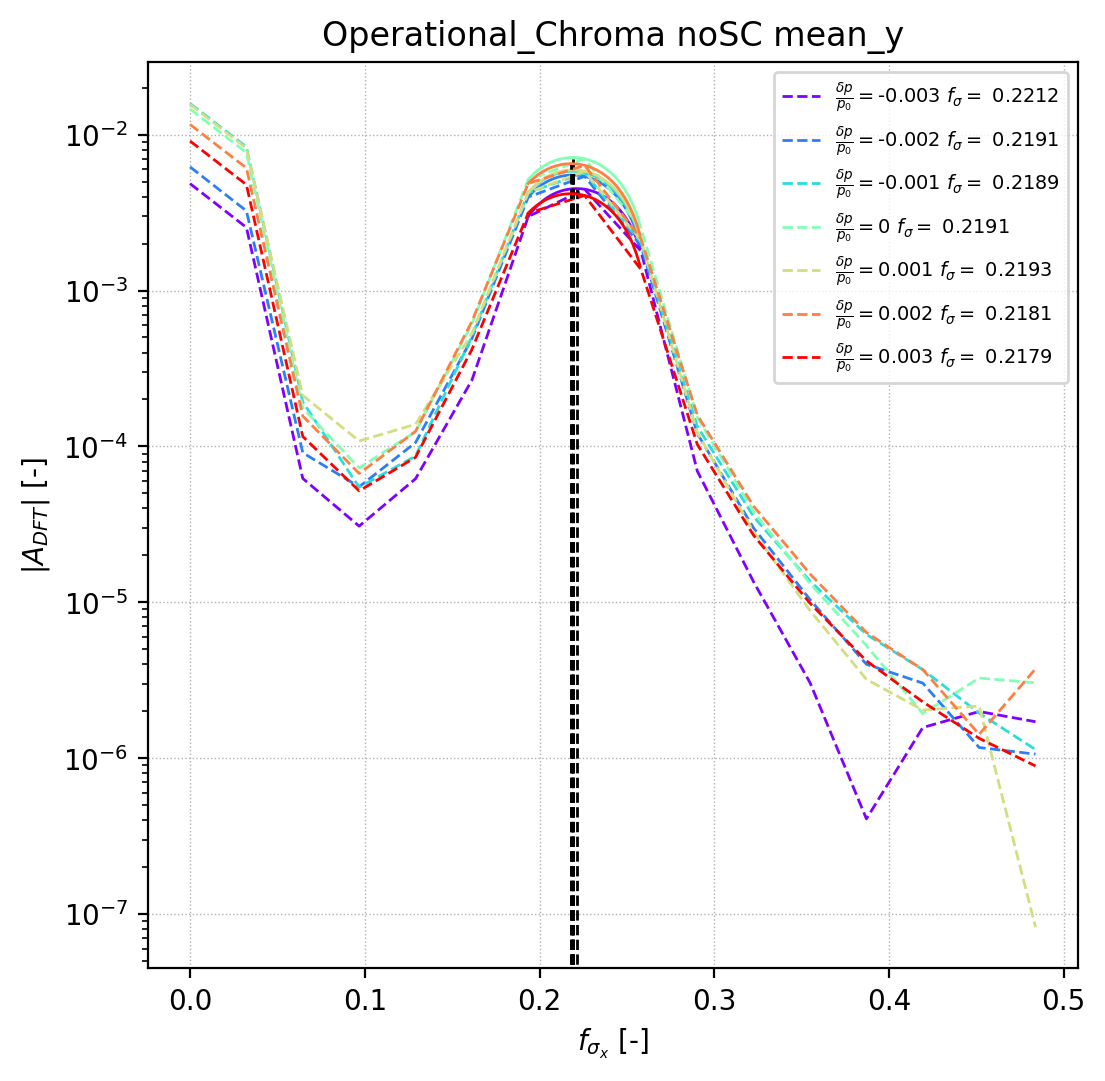

In [22]:
# Store envelope oscillation frequencies
f_sig_x = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_x'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_x.append(f_max)
    qx_fft.append(f_max)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'x_fft.png'
plt.savefig(savename, dpi = 800);

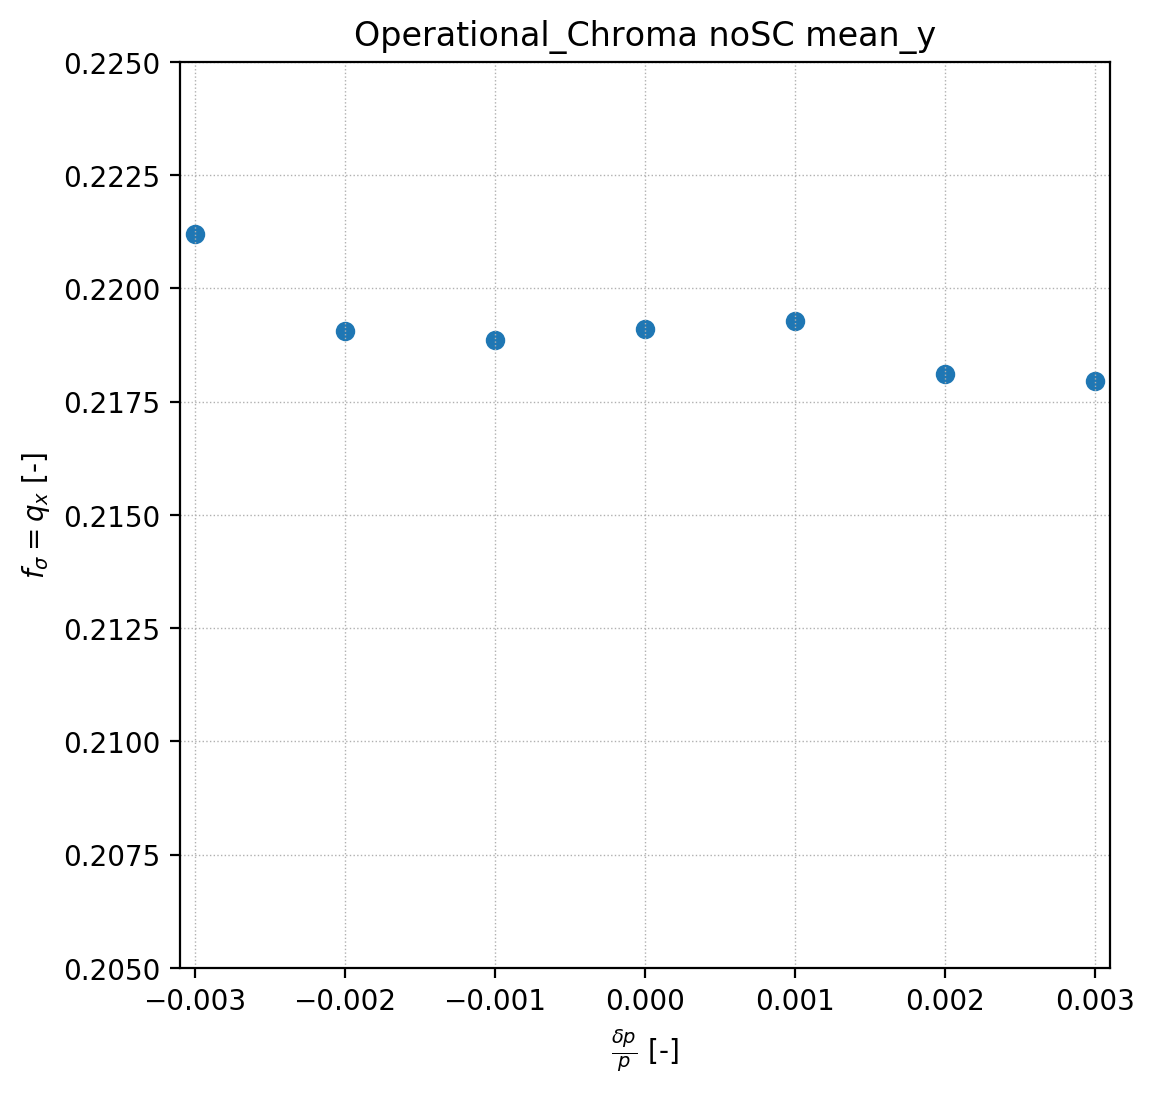

In [23]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' ' + parameter;
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];
ax1.scatter(dps, f_sig_x);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

savename = save_folder + 'qx.png'
plt.savefig(savename, dpi = 800);

# Calculate tunes using NAFF

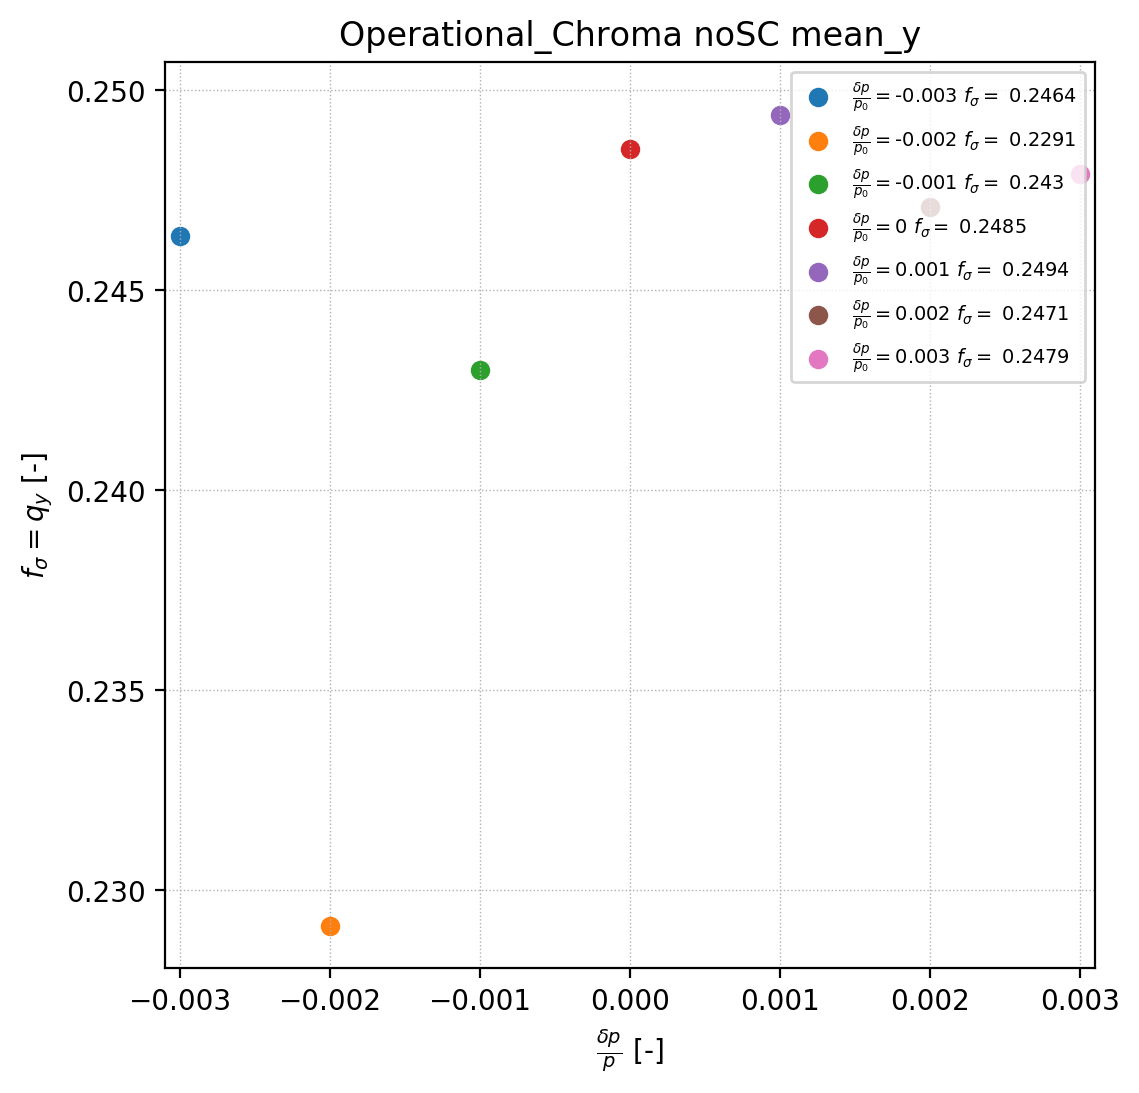

In [24]:
parameter = 'mean_y'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

skiptrns= 0
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 

        
    f_sig_x.append(freq)
    qy_naff.append(freq)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_naff.png'
plt.savefig(savename, dpi = 800);

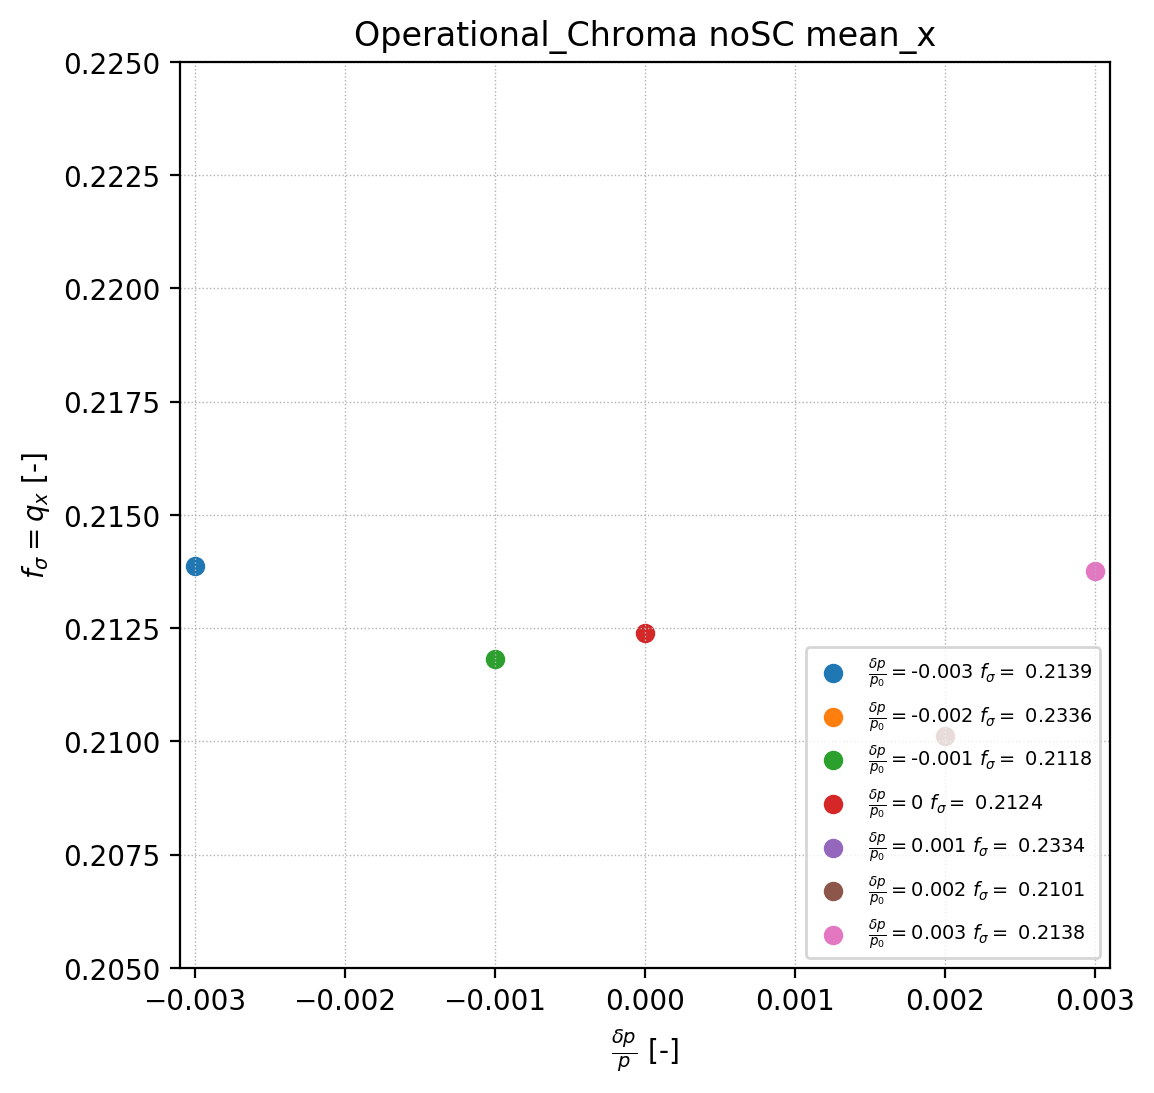

In [25]:
parameter = 'mean_x'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

skiptrns= 6
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 
        
    f_sig_x.append(freq)
    qx_naff.append(freq)
    
ax1.legend(fontsize='x-small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_naff.png'
plt.savefig(savename, dpi = 800);

# Compare different calculated tunes

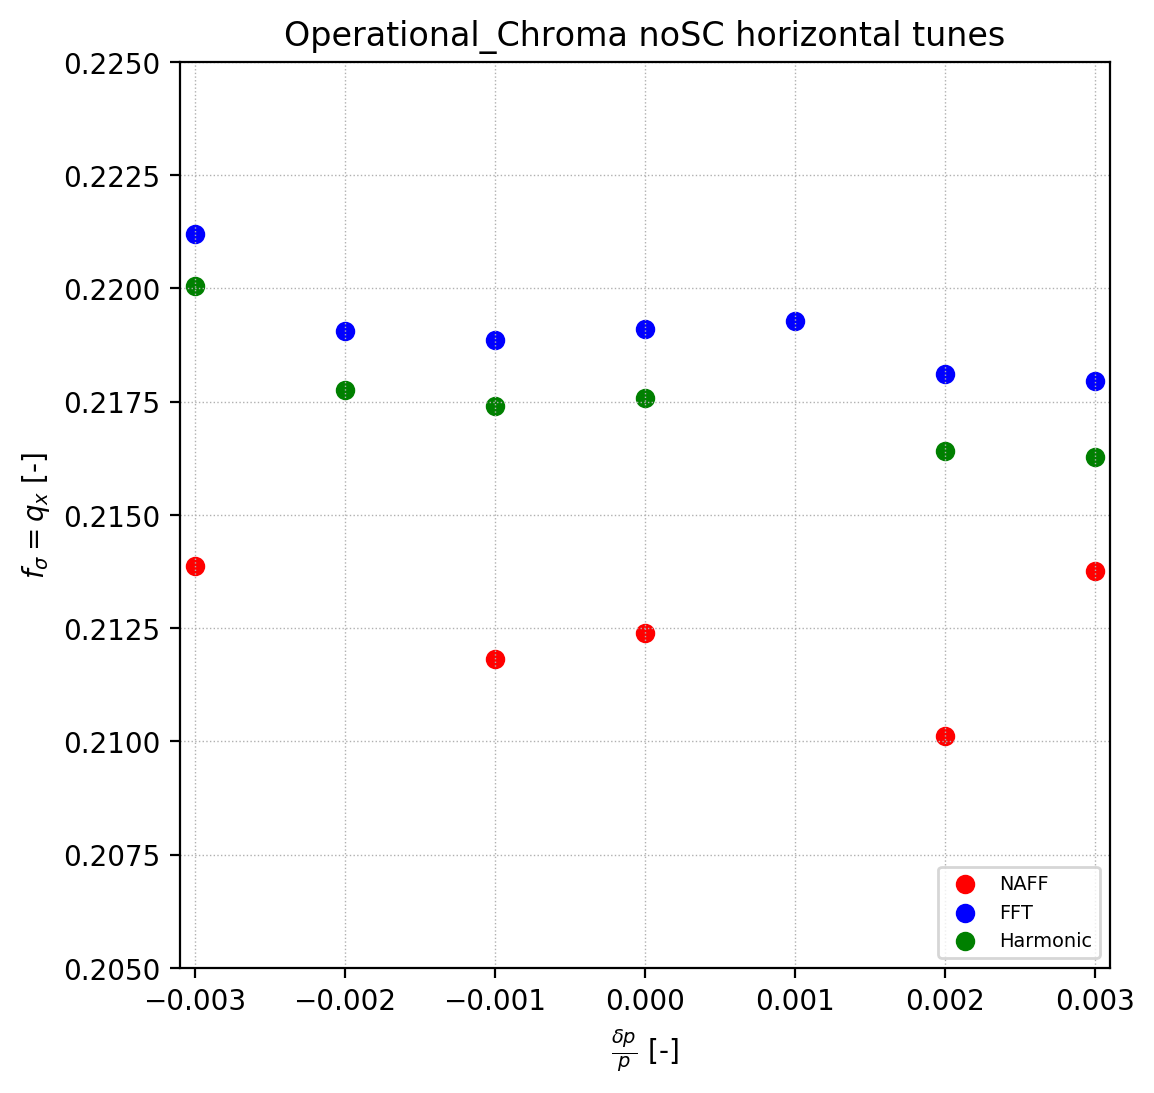

In [26]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' horizontal tunes'
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, qx_naff, label='NAFF', color='r');
ax1.scatter(dps, qx_fft, label='FFT', color='b');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g');

ax1.legend(fontsize='x-small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_cf.png'
plt.savefig(savename, dpi = 800);

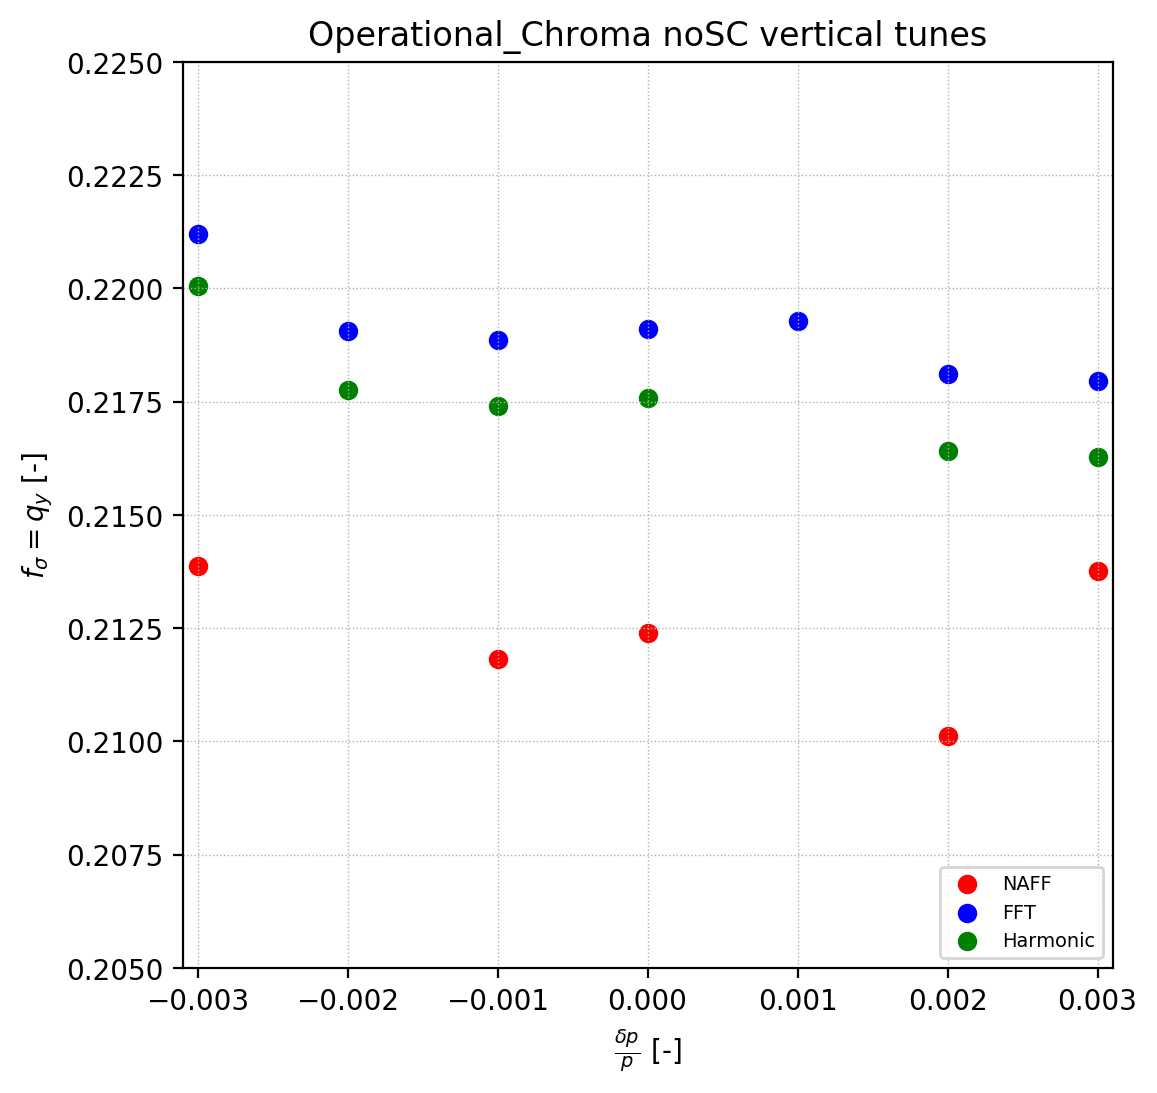

In [27]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' vertical tunes'
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, qy_naff, label='NAFF', color='r');
ax1.scatter(dps, qy_fft, label='FFT', color='b');
ax1.scatter(dps, qy_harmonic, label='Harmonic', color='g');

ax1.legend(fontsize='x-small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_cf.png'
plt.savefig(savename, dpi = 800);